In [1]:
# %load basic_example_F.py
import src.core as mlApi

Using TensorFlow backend.


In [2]:
# 1. Define dataset specifics

# File path to dataset .csv file
filename = "../master-thesis-db/datasets/F/data_30min.csv"

# List of columns on form ['name', 'desc', 'unit']
columns = [
	['FYN0111', 'Gasseksport rate', 'MSm^3/d'],
	['FT0111', 'Gasseksport molvekt','g/mole'],
	['TT0102_MA_Y', 'Varm side A temperatur inn', 'degrees'],
	['TIC0101_CA_YX', 'Varm side A temperatur ut', 'degrees'],
	['TT0104_MA_Y', 'Varm side B temperatur inn', 'degrees'],
	['TIC0103_CA_YX', 'Varm side B temperatur ut', 'degrees'],
	['TT0106_MA_Y', 'Varm side C temperatur inn', 'degrees'],
	['TIC0105_CA_YX', 'Varm side C temperatur ut', 'degrees'],
	['TI0115_MA_Y', 'Scrubber temperatur ut', 'degrees'],
	['PDT0108_MA_Y', 'Varm side A trykkfall', 'Bar'],
	['PDT0119_MA_Y', 'Varm side B trykkfall', 'Bar'],
	['PDT0118_MA_Y', 'Varm side C trykkfall', 'Bar'],
	['PIC0104_CA_YX', 'Innløpsseparator trykk', 'Barg'],
	['TIC0425_CA_YX', 'Kald side temperatur inn', 'degrees'],
	['TT0651_MA_Y', 'Kald side A temperatur ut', 'degrees'],
	['TT0652_MA_Y', 'Kald side B temperatur ut', 'degrees'],
	['TT0653_MA_Y', 'Kald side C temperatur ut', 'degrees'],
	['TIC0101_CA_Y', 'Kald side A ventilåpning', '%'],
	['TIC0103_CA_Y', 'Kald side B ventilåpning', '%'],
	['TIC0105_CA_Y', 'Kald side C ventilåpning', '%'],
]

# List of column names to ignore completely
irrelevantColumns = [
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
		'TIC0105_CA_Y',
]

# List of column names used a targets
targetColumns = [
	'TT0653_MA_Y',
]


# List of training periods on form ['start', 'end']
traintime = [
	["2018-01-01 00:00:00", "2018-08-01 00:00:00"],
]

# Testing period, recommended: entire dataset
testtime = [
    "2018-01-01 00:00:00",
    "2019-05-01 00:00:00"
]

In [3]:
# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

In [4]:
# 3. Define models

mlpd_1x_128 = mlApi.MLP('mlpd 1x 128', layers=[128], dropout=0.2)
lstmd_1x_128 = mlApi.LSTM('lstmd 1x 128', layers=[128], dropout=0.2, recurrentDropout=0.2, enrolWindow=16)
mlpd_2x_64 = mlApi.MLP('mlpd 2x 64', layers=[64, 64], dropout=0.2)
lstmd_2x_64 = mlApi.LSTM('lstmd 2x 64', layers=[64, 64], dropout=0.2, recurrentDropout=0.2, enrolWindow=16)
linear_r = mlApi.Linear_Regularized('linear r')
ensemble1 = mlApi.Ensemble('mlp2 + linear ensemble', [mlpd_2x_64, linear_r])
ensemble2 = mlApi.Ensemble('lstm2 + mlp2 ensemble', [mlpd_2x_64, lstmd_2x_64])

modelList = [
    mlpd_1x_128,
    lstmd_1x_128,
	mlpd_2x_64,
	lstmd_2x_64,
    ensemble1,
    ensemble2,
	linear_r,
]

Model mlpd 1x 128 was loaded from file
Model lstmd 1x 128 was loaded from file
Model mlpd 2x 64 was loaded from file
Model lstmd 2x 64 was loaded from file
Model mlp2 + linear ensemble was loaded from file
Training submodel linear r of Ensemble mlp2 + linear ensemble
Model lstm2 + mlp2 ensemble was loaded from file
Model lstm2 + mlp2 ensemble was loaded from file
Training model linear r
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| mlpd 1x 128  |  0.436427 |   0.458929  |    0.377106   |  468   |
| lstmd 1x 128 |   8e-06   |   0.000249  |    0.117178   |  445   |
|  mlpd 2x 64  |  0.346867 |   0.40418   |    0.425368   |  361   |
| lstmd 2x 64  |  0.000106 |   0.001054  |    0.105082   |  134   |
+--------------+-----------+-------------+---------------+--------+


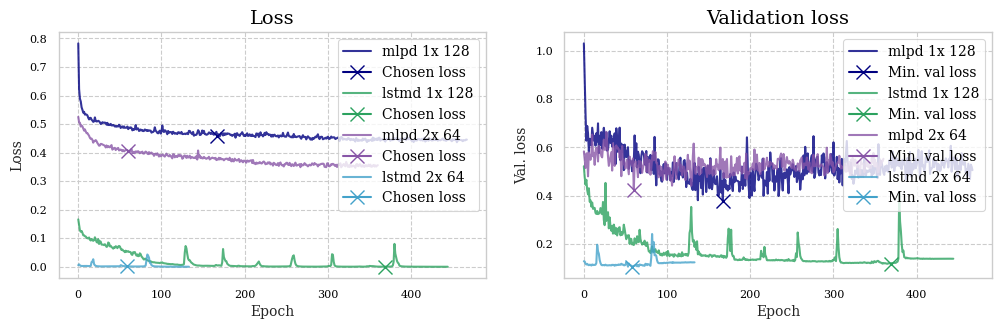

In [5]:
# 4. Initiate and train models

# Define whether to retrain models or not
retrain=False

mlApi.initModels(modelList)
mlApi.trainModels(retrain)

Model prediction scores
+------------------------+-------------+------------+
|         Model          | Train score | Test score |
+------------------------+-------------+------------+
|      mlpd 1x 128       |    0.5737   |  -0.5515   |
|      lstmd 1x 128      |    0.866    |   0.1415   |
|       mlpd 2x 64       |    0.6123   |  -0.0407   |
|      lstmd 2x 64       |    0.8912   |  -0.1376   |
| mlp2 + linear ensemble |    0.6189   |   0.0163   |
| lstm2 + mlp2 ensemble  |    0.8979   |   0.1539   |
|        linear r        |    0.3234   |   0.0673   |
+------------------------+-------------+------------+


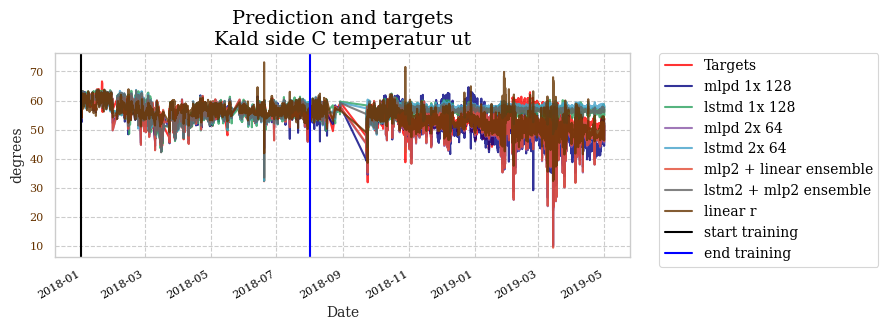

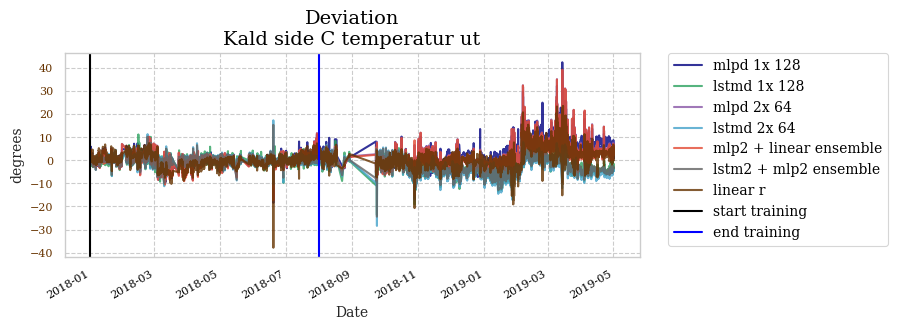

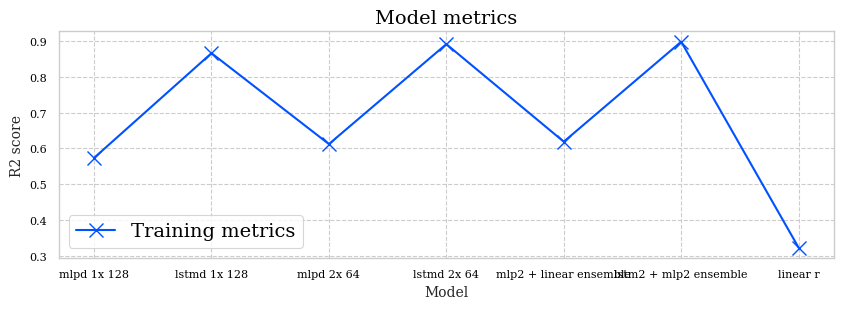

In [6]:
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
	score=True,
)

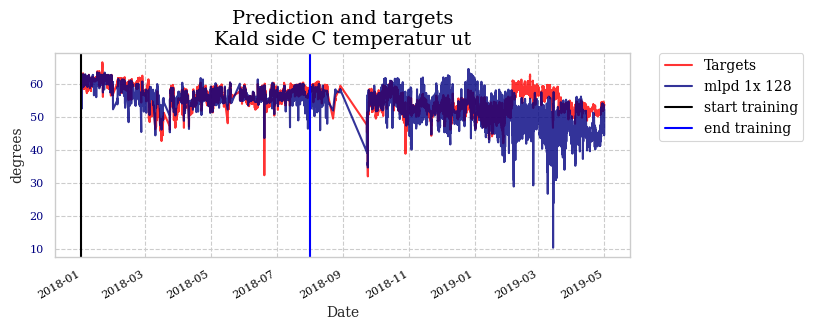

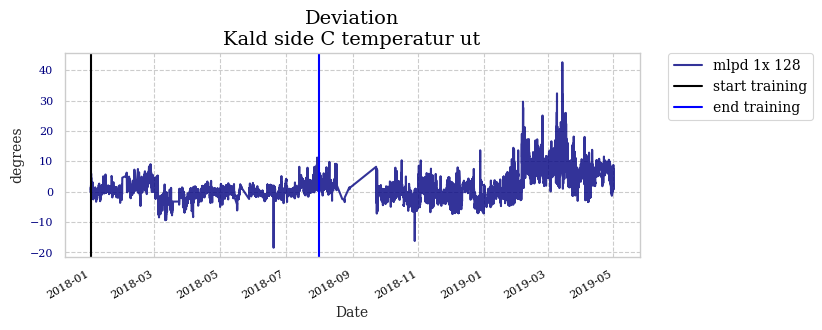

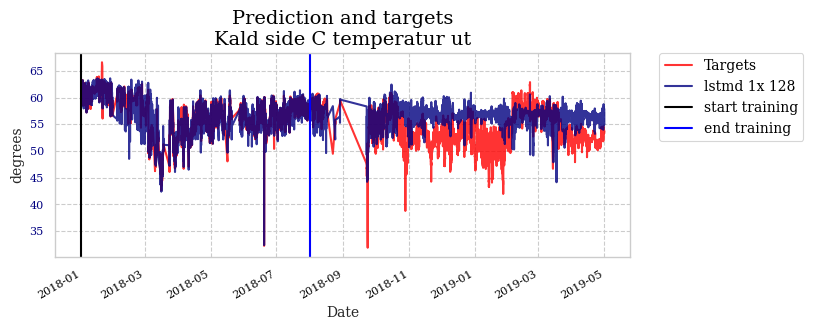

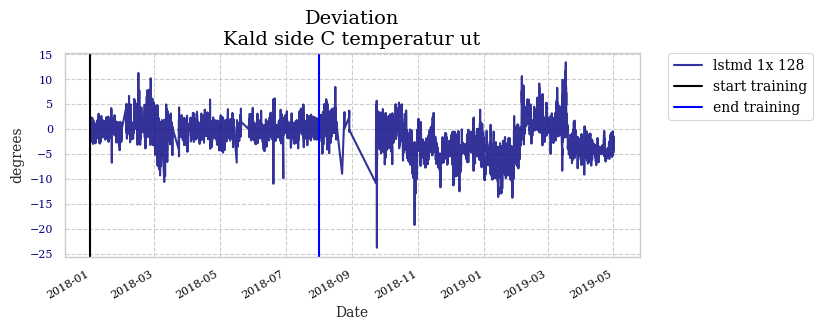

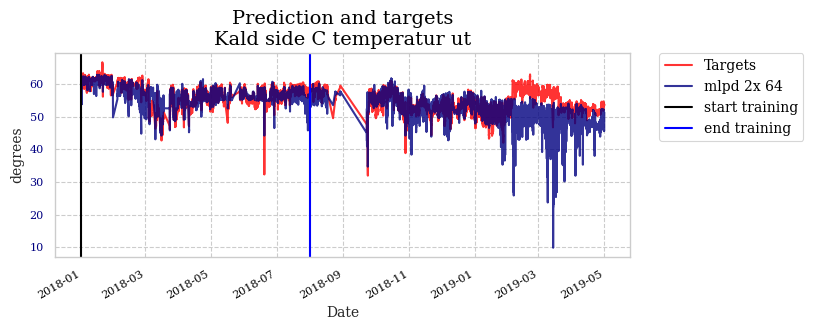

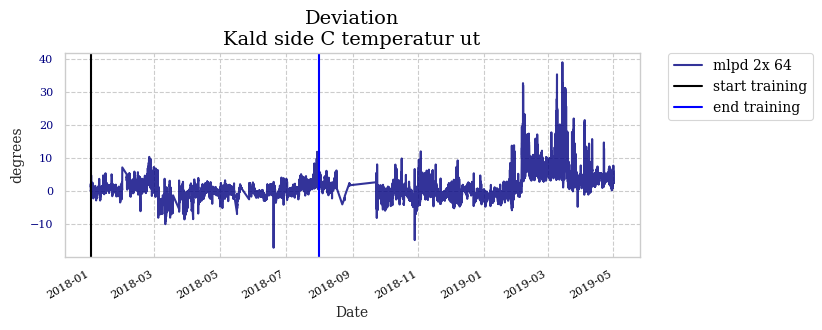

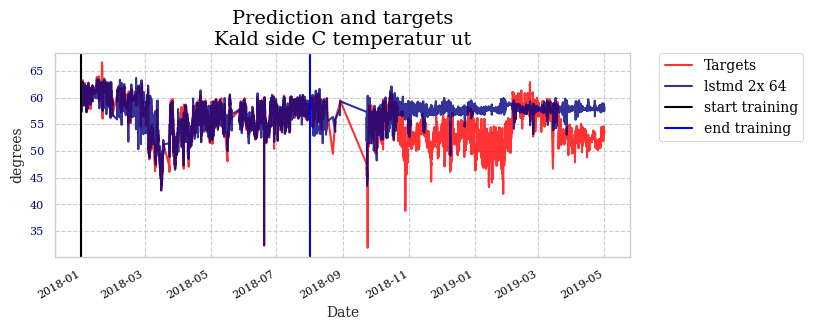

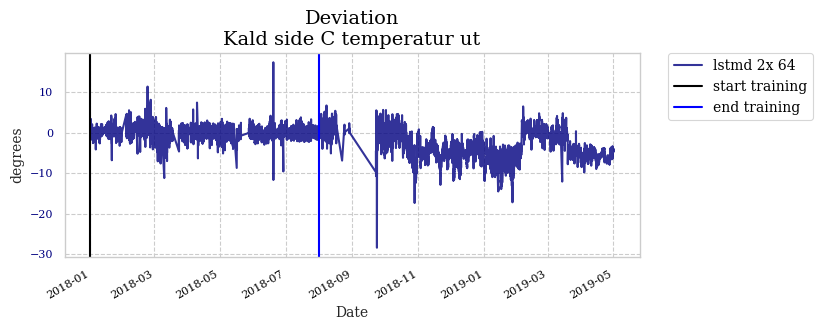

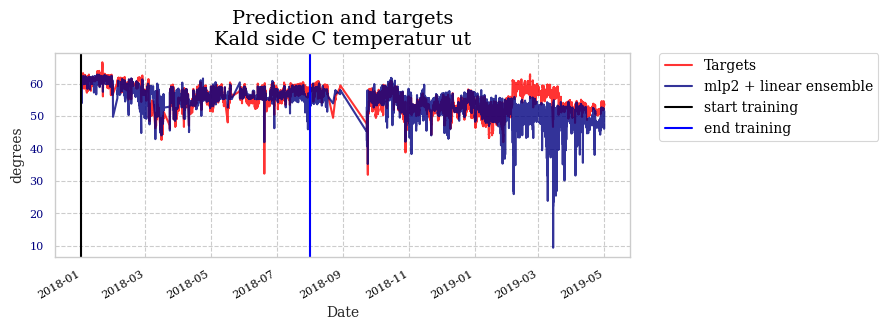

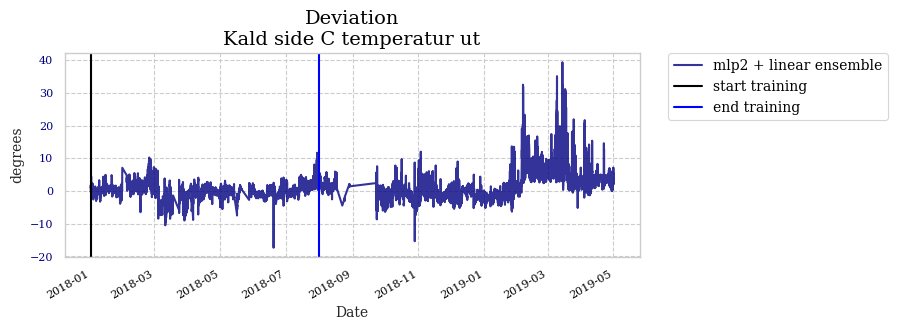

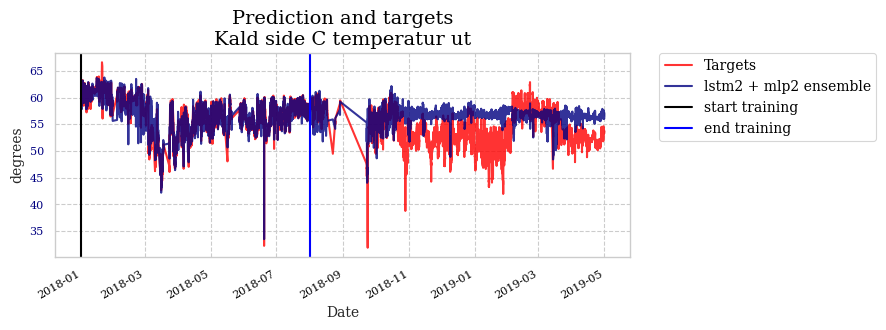

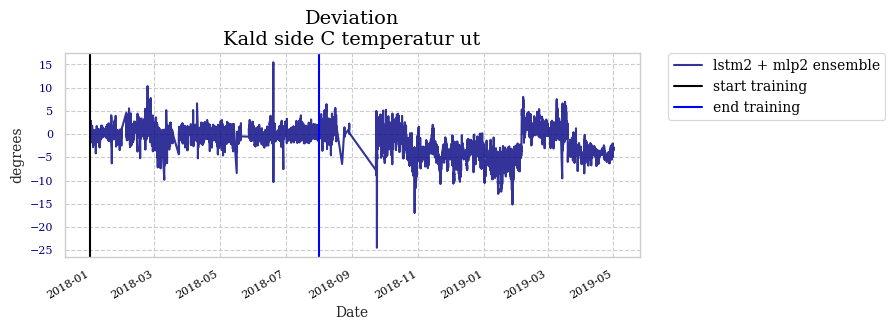

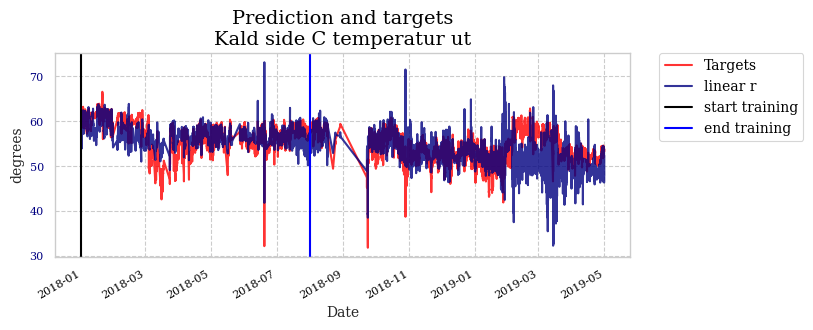

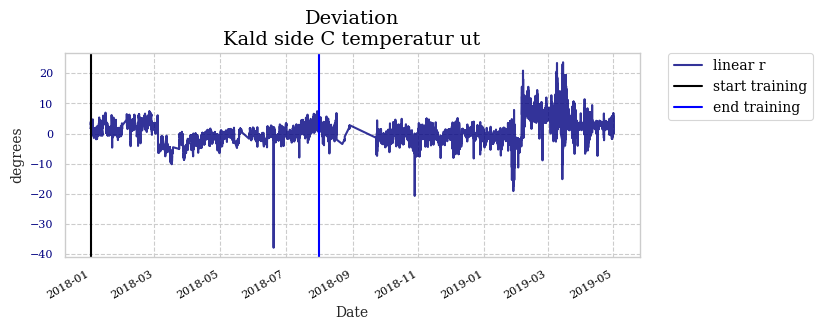

In [7]:
for model in modelList:
    mlApi.initModels([model])
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=True,
        interpol=False,
        score=False,
    )